### <h1> Task 2 <h1> (Поиск максимума из минимумов в строках квадратной матрицы)

In [17]:
from IPython.display import display
import pandas as pd
from myplots import time_iter_plot, time_thread_plot, speedup_plot

In [18]:
data_1 = pd.read_csv('data/matrix_1.csv')
data_2 = pd.read_csv('data/matrix_2.csv')
display(data_1)
display(data_2)

,Num_Threads,Iter,Time
0,1,10,3778
1,2,10,315
2,3,10,183
3,4,10,197
4,5,10,165
...,...,...,...
59,12,10000,181929
60,13,10000,192599
61,14,10000,231350
62,15,10000,203503


,Num_Threads,Iter,Time
0,1,10,134
1,2,10,217
2,3,10,101
3,4,10,133
4,5,10,90
...,...,...,...
59,12,10000,185302
60,13,10000,221441
61,14,10000,216231
62,15,10000,221865


In [19]:
labels = ['OneFor', 'TwoFor']

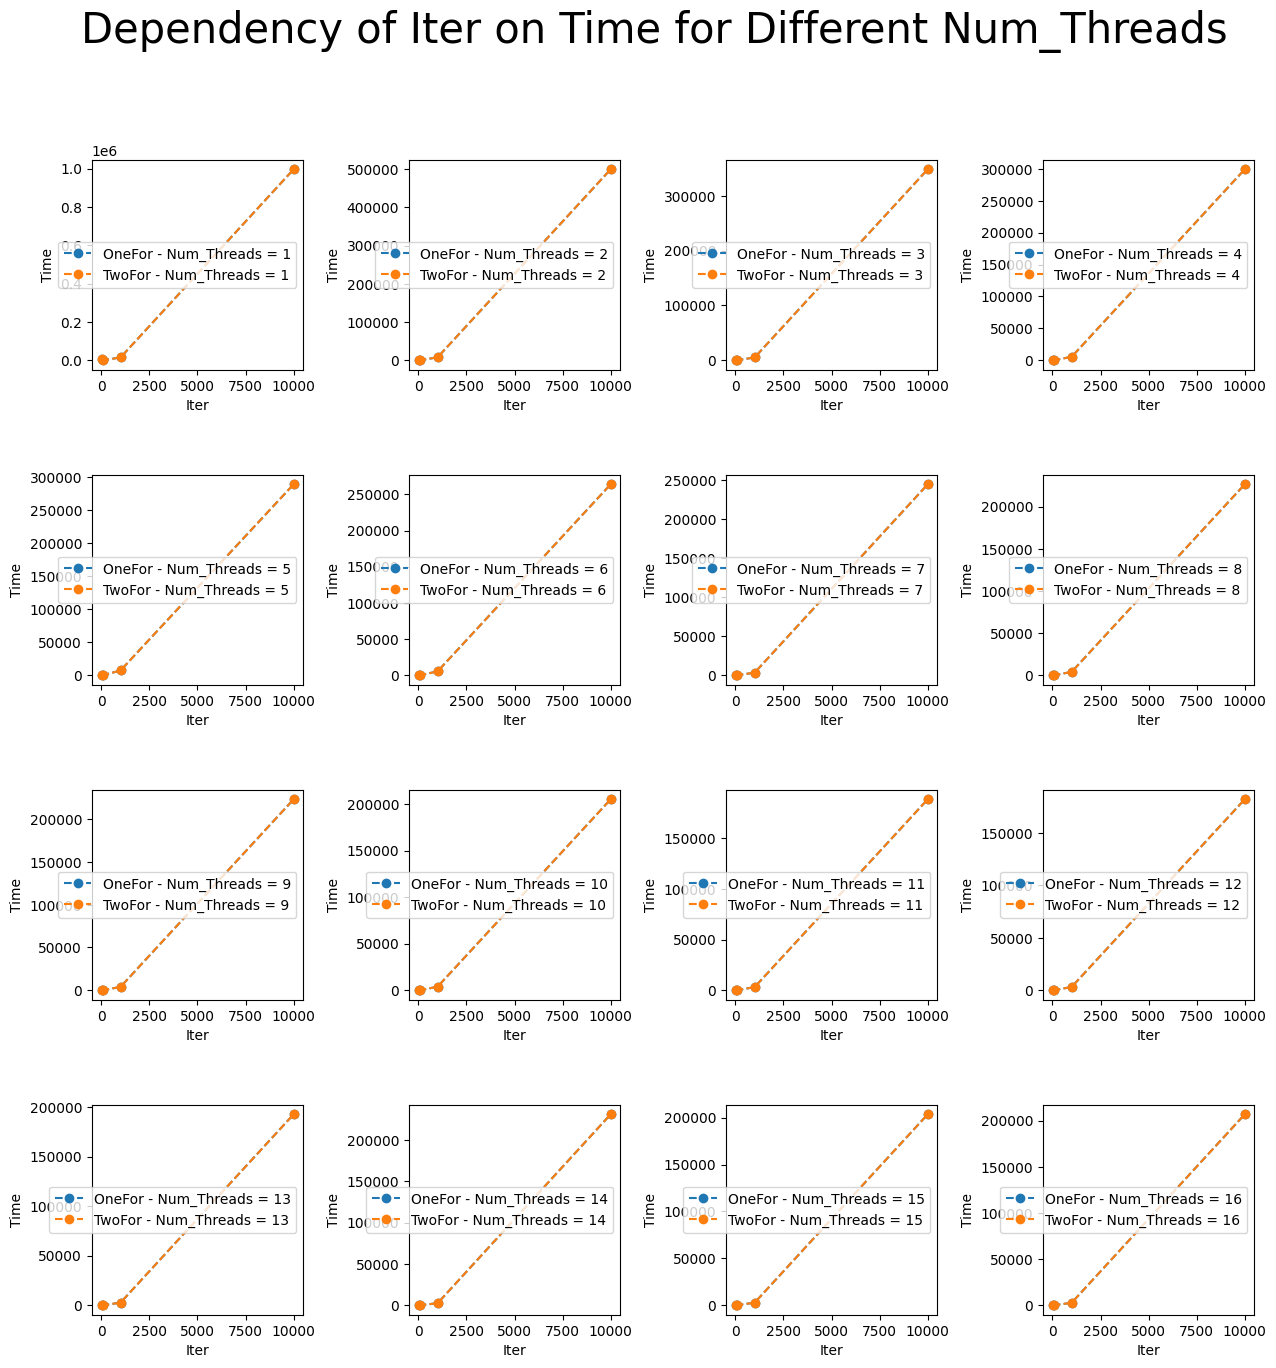

In [20]:
thread_groups_1 = data_1.groupby('Num_Threads')
thread_groups_2 = data_1.groupby('Num_Threads')

thread_groups = [thread_groups_1, thread_groups_2]
time_iter_plot(thread_groups, labels)

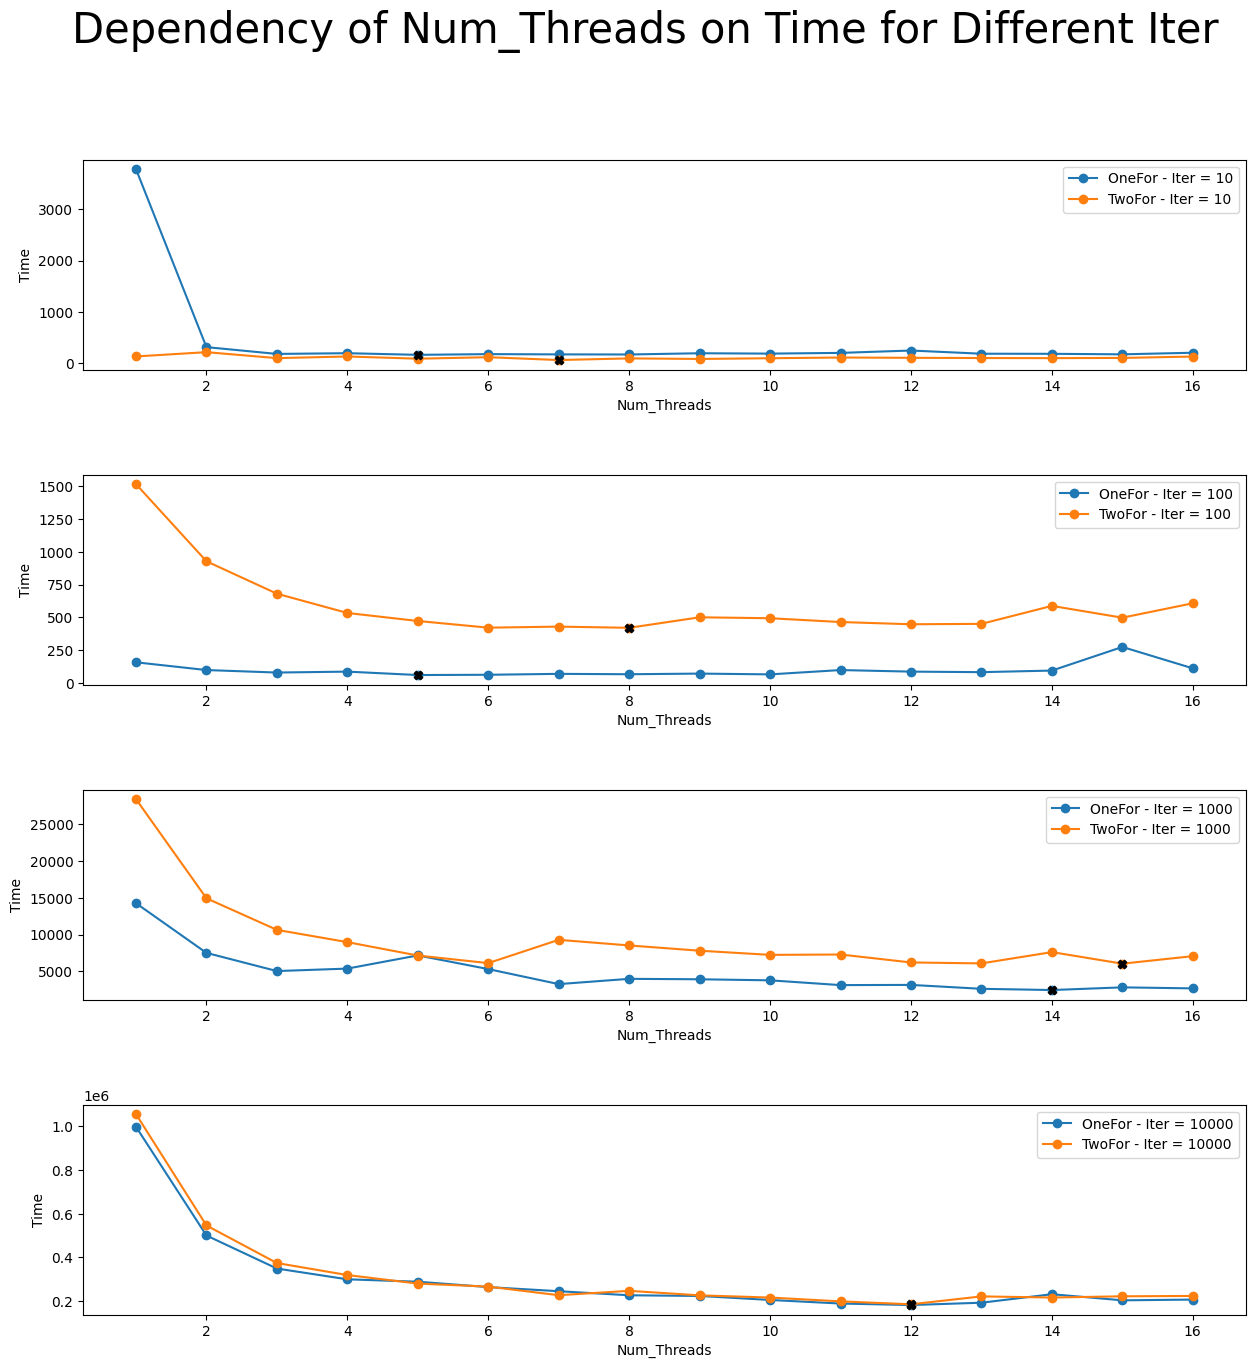

In [21]:
iter_groups_1 = data_1.groupby('Iter', as_index=False)
iter_groups_2 = data_2.groupby('Iter', as_index=False)

iter_groups = [iter_groups_1, iter_groups_2]
time_thread_plot(iter_groups, labels)

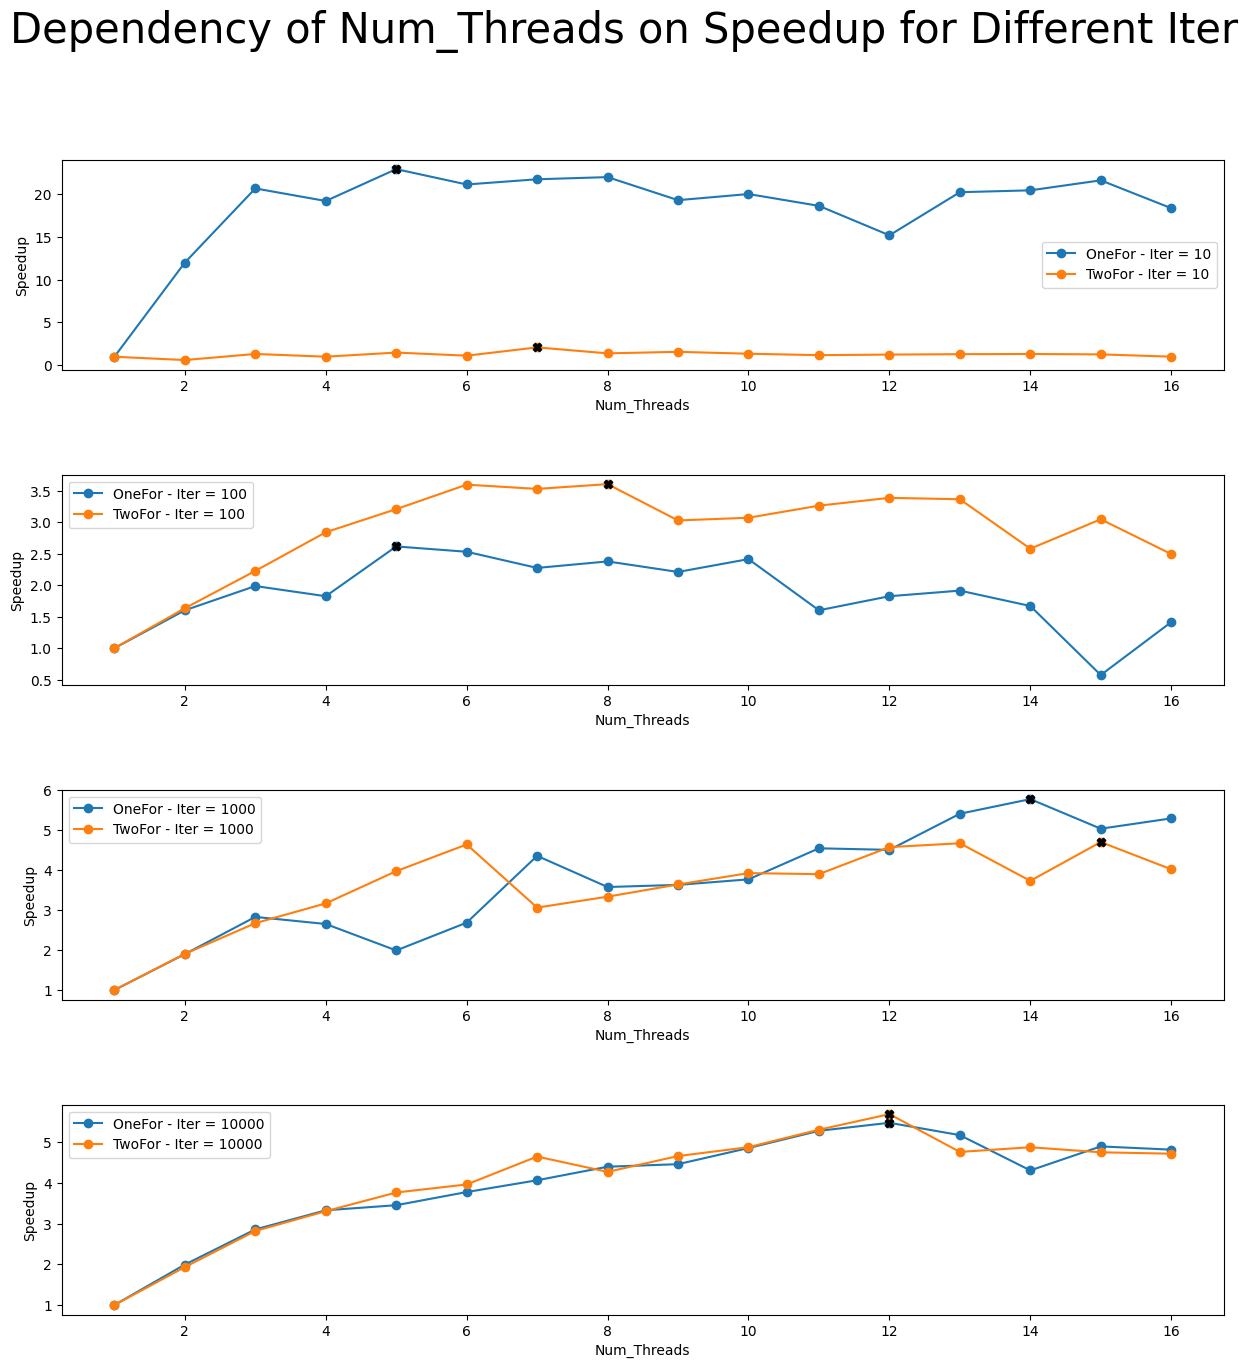

In [22]:
speedup_plot(iter_groups, labels)

# Вывод:
Из представленных графиков можно сделать вывод, что двойной уровень вложенности распараллеливания цикла не даёт как существенного прироста, так и замедления для данной задачи.
***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 